Lasso Regression:

Y = wX + b

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias



Gradient Descent:

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db



Learning Rate:

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

Gradient for Weights



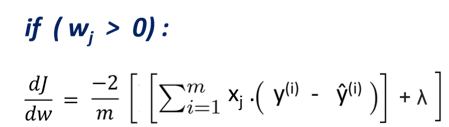


Gradient for Bias


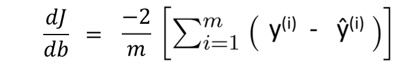


In [1]:
import numpy as np

In [40]:
# creating a class for Lasso Regression

class Lasso_Regression():

  #initiating the hyperparameters
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter


  # fitting the dataset to the Lasso Regression model
  def fit(self, X, Y):

    # m --> number of Data points --> number of rows
    # n --> number of input features --> number of columns
    self.m, self.n = X.shape

    self.w = np.zeros(self.n)

    self.b = 0

    self.X = X

    self.Y = Y

    # implementing Gradient Descent algorithm for Optimization

    for i in range(self.no_of_iterations):     # missed "self"
      self.upadte_weights()


  # function for updating the weight & bias value
  def upadte_weights(self):

    # linear equation of the model
    Y_prediction = self.predict(self.X)

    # gradients (dw, db)

    # gradient for weight
    dw = np.zeros(self.n)

    for i in range(self.n):

      if self.w[i]>0:

        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) + self.lambda_parameter) / self.m

      else :

        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) - self.lambda_parameter) / self.m


    # gradient for bias
    db = - 2 * np.sum(self.Y - Y_prediction) / self.m


    # updating the weights & bias

    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db




  # Predicting the Target variable
  def predict(self,X):

    return X.dot(self.w) + self.b




## Using Linear Regression model for Prediction

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics

## Data Preprocessing

In [42]:
salary_data = pd.read_csv('/content/salary_data.csv')

In [43]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [44]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [45]:
salary_data.shape

(30, 2)

In [46]:
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


Spliting the features & Target

In [47]:
features = salary_data.iloc[:,:-1].values
target = salary_data.iloc[:,1].values

In [48]:
print(features)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [49]:
print(target)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


Spliting the dataset into training & test data

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target,
                                                    test_size=0.33,
                                                    random_state = 2)

In [51]:
model = Lasso_Regression(learning_rate = 0.02, no_of_iterations=1000,
                         lambda_parameter=200)

In [53]:
model.fit(X_train, Y_train)

Predict the salary value for test data

In [54]:

test_data_prediction = model.predict(X_test)

In [55]:
print(test_data_prediction)

[ 36068.90441536  34166.14804787  66513.00629512  58901.98082518
  91248.83907243  80783.67905126 101713.9990936   52242.33353898
  42728.55170156  88394.7045212 ]


In [57]:
from sklearn import metrics

# R squared error
score_1 = metrics.r2_score(Y_test,test_data_prediction)

# Mean Absulate error
score_2 = metrics.mean_absolute_error(Y_test,test_data_prediction)

print("R squared error: ", score_1)
print("Mean Absulate error: ", score_2)

R squared error:  0.9041366551714738
Mean Absulate error:  6675.382767802961


Comparing the error with sklearn lasso regression

In [59]:
from sklearn.linear_model import Lasso
sk_model = Lasso()

In [60]:
sk_model.fit(X_train, Y_train)

Lasso()

In [61]:
sk_test_data_prediction = sk_model.predict(X_test)

In [63]:
# R squared error
score_1_ = metrics.r2_score(Y_test, sk_test_data_prediction)

# Mean Absulate error
score_2_ = metrics.mean_absolute_error(Y_test, sk_test_data_prediction)


print("R squared error: ", score_1_)
print("Mean Absulate error: ", score_2_)

R squared error:  0.9041817142395875
Mean Absulate error:  6673.480440148538
